In [631]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


df = pd.read_csv("heavymachine_data.csv", sep=";")
df.drop("Chassi", axis="columns", inplace=True)
output_colum = "Hours"
input_colums = ["Model","Aplication","Age"]

# df = pd.read_csv("insurance.csv", sep=",")
# df.drop(["sex","smoker","region"], axis="columns", inplace=True)
# output_colum = "charges"
# input_colums = ["age","bmi","children"]

# df = pd.read_csv("data.csv", sep=",")
# output_colum = "out"
# input_colums = ["x","y","z"]

# df.head()
df.describe()

,Hours,Model,Aplication,Age
count,1152.000000,1152.000000,1152.000000,1152.000000
mean,4704.077257,74.809896,39.418403,7.936632
std,25988.373648,41.143889,23.591115,5.191416
min,1.000000,0.000000,0.000000,1.000000
25%,1100.250000,24.000000,18.000000,4.000000
50%,2197.000000,96.000000,39.000000,7.000000
75%,3842.250000,111.000000,61.000000,10.000000
max,595260.000000,125.000000,79.000000,31.000000


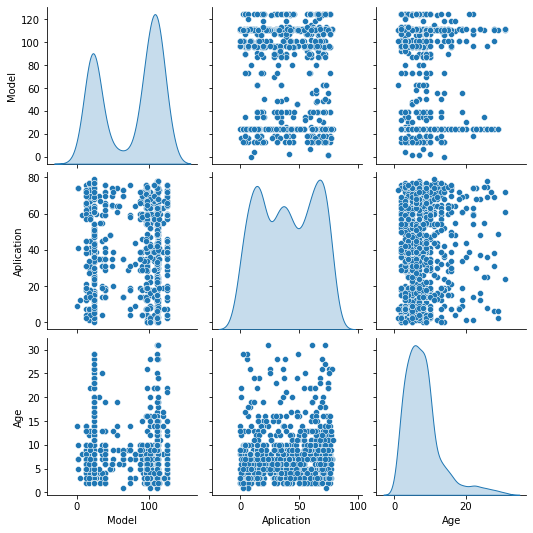

In [632]:

train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)
sns.pairplot(train_dataset[input_colums], diag_kind="kde")


In [633]:
train_stats = train_dataset.describe()
train_stats.pop(output_colum)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Model,922.0,73.569414,41.493482,0.0,24.0,96.0,111.00,125.0
Aplication,922.0,39.749458,23.784755,0.0,18.0,39.0,62.75,79.0
Age,922.0,8.000000,5.265585,1.0,5.0,7.0,10.00,31.0


In [634]:
train_labels = train_dataset.pop(output_colum)
# print(train_labels.head())
test_labels = test_dataset.pop(output_colum)

def norm(x):
      return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Configure the model

In [635]:
def build_model():
    model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[len(train_dataset.keys())]), # kernel_regularizer=keras.regularizers.L2(0.1)
    # layers.Dense(32, activation='relu'),
    layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.1)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

model = build_model()
model.summary()


Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_379 (Dense)            (None, 4)                 16        
_________________________________________________________________
dense_380 (Dense)            (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [636]:
# example_batch = normed_train_data[:10]
# example_result = model.predict(example_batch)
# example_result

In [637]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1500

# history = model.fit(
#   normed_train_data, train_labels,
#   epochs=EPOCHS, validation_split = 0.2, verbose=0,
#   callbacks=[PrintDot()], workers=4, use_multiprocessing=True)


In [638]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()


In [639]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label = 'Val Error')
#     plt.ylim([0,5])
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')
#     plt.ylim([0,20])
    plt.legend()
    plt.show()


# plot_history(history)


# Fit the model


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

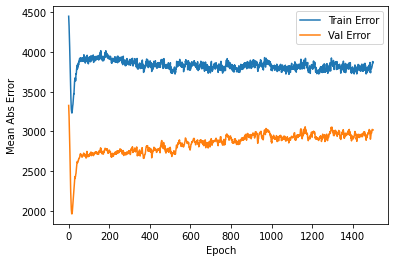

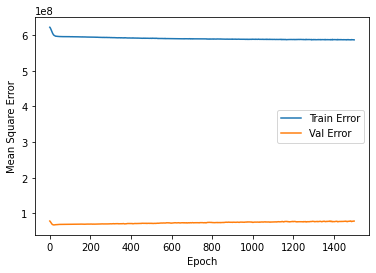

In [640]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras

# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
#                     validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

plot_history(history)


In [641]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))


8/8 - 0s - loss: 1355482880.0000 - mae: 5825.5493 - mse: 1355482880.0000
Testing set Mean Abs Error: 5825.55


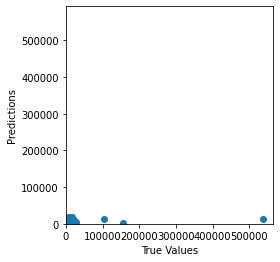

In [642]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


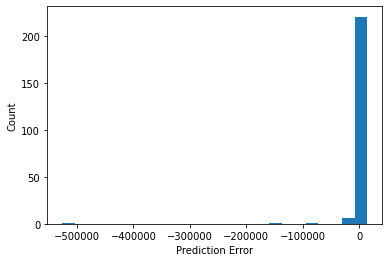

In [643]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")
